Formula used for Gradient Descent
w = w + lr*((y-y_hat)*x)/m

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [86]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

(-3.0, 2.0)

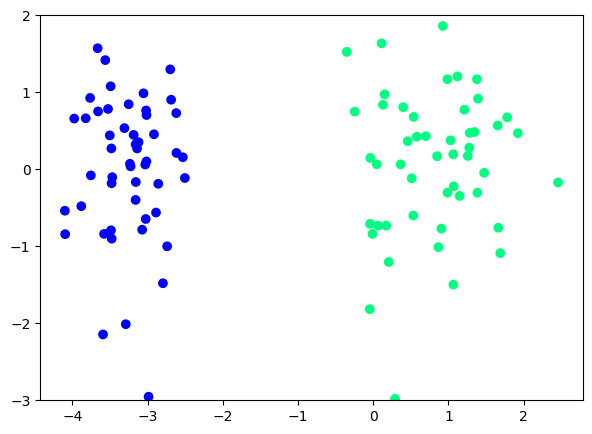

In [87]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter")
plt.ylim(-3,2)

In [88]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(solver="sag")
lor.fit(X,y)

LogisticRegression(solver='sag')

In [89]:
print(lor.coef_)
print(lor.intercept_)

[[2.3677601  0.02170279]]
[3.1392518]


In [90]:
ml = -(lor.coef_[0][0]/lor.coef_[0][1])
bl = -(lor.intercept_/lor.coef_[0][1])

In [91]:
ml , bl

(np.float64(-109.0993409503073), array([-144.64738324]))

In [92]:
x_input = np.linspace(-3,3,1000)
y_input = ml * x_input + bl

In [93]:
def gd(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.5

  for i in range(10000):
    y_hat = sigmoid(np.dot(X,weights))
    weights = weights + lr * (np.dot((y-y_hat),X)/X.shape[0])

  return weights[1:], weights[0]

def sigmoid(z):
  return 1/(1+np.exp(-z))

In [94]:
coef_  , intercept_  = gd(X,y)

In [95]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [96]:
x_input_1 = np.linspace(-3,3,1000)
y_input_1 = m * x_input_1 + b

(-3.0, 2.0)

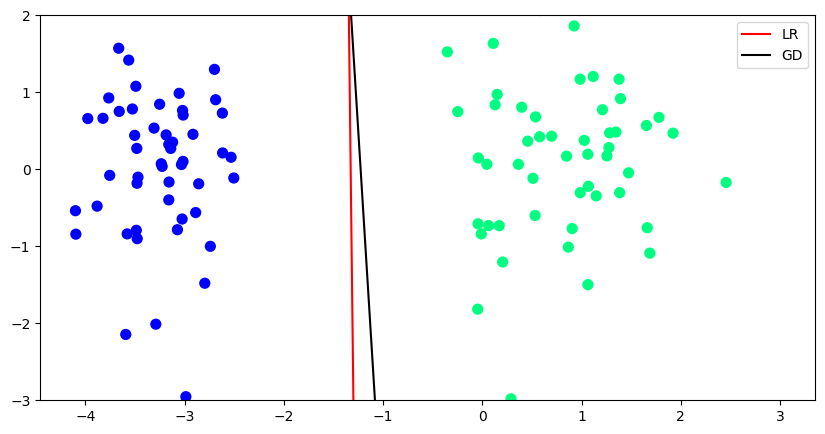

In [97]:
plt.figure(figsize = (10 , 5))
plt.plot(x_input,y_input,color="red",label="LR")
plt.plot(x_input_1,y_input_1,color="black",label="GD")
plt.scatter(X[:,0],X[:,1],c=y , cmap="winter",s=50)
plt.legend()
plt.ylim(-3,2)